In [1]:
# Import required libraries
import pandas as pd
import os

# Define file paths
PICKLE_PATH = r"E:\TIme series proj\files\final_dataset.pkl"
PLOT_DIR = r"E:\TIme series proj\Dataset"
PICKLE_DIR = r"E:\TIme series proj\files"

# Ensure directories exist
os.makedirs(PLOT_DIR, exist_ok=True)
os.makedirs(PICKLE_DIR, exist_ok=True)

# Load the final dataset
df = pd.read_pickle(PICKLE_PATH)
print("Final dataset loaded successfully!")
print("Dataset Shape:", df.shape)
print("Time Range:", df.index.min(), "to", df.index.max())

Final dataset loaded successfully!
Dataset Shape: (121269, 9)
Time Range: 2004-10-01 01:00:00 to 2018-08-03 00:00:00


In [2]:
# --- Section 1: Gap Analysis and Handling ---
print("\nSection 1: Gap Analysis and Handling")
# Summarize dataset
print("Initial Dataset Shape:", df.shape)
print("Initial Time Range:", df.index.min(), "to", df.index.max())

# Check for gaps
expected_hours = pd.date_range(start=df.index.min(), end=df.index.max(), freq='H')
missing_hours = expected_hours.difference(df.index)
print(f"\nNumber of missing hours: {len(missing_hours)}")
print("First few missing hours:", missing_hours[:5])

# Analyze gap pattern (check for DST)
dst_candidates = missing_hours[(missing_hours.month == 3) | (missing_hours.month == 11)]  # U.S. DST months
print(f"\nPossible DST-related gaps (March/November): {len(dst_candidates)}")
print("DST candidate hours:", dst_candidates)

# Interpolate missing values
df = df.reindex(expected_hours)
df['AEP_MW'] = df['AEP_MW'].interpolate(method='linear')
df['Lag_1'] = df['AEP_MW'].shift(1)  # Recalculate Lag_1 after reindexing

# Verify no missing values
print("\nMissing Values after Interpolation:")
print(df.isnull().sum())



Section 1: Gap Analysis and Handling
Initial Dataset Shape: (121269, 9)
Initial Time Range: 2004-10-01 01:00:00 to 2018-08-03 00:00:00

Number of missing hours: 27
First few missing hours: DatetimeIndex(['2004-10-31 02:00:00', '2005-04-03 03:00:00',
               '2005-10-30 02:00:00', '2006-04-02 03:00:00',
               '2006-10-29 02:00:00'],
              dtype='datetime64[ns]', freq=None)

Possible DST-related gaps (March/November): 20
DST candidate hours: DatetimeIndex(['2007-03-11 03:00:00', '2007-11-04 02:00:00',
               '2008-03-09 03:00:00', '2008-11-02 02:00:00',
               '2009-03-08 03:00:00', '2009-11-01 02:00:00',
               '2010-03-14 03:00:00', '2010-11-07 02:00:00',
               '2011-03-13 03:00:00', '2011-11-06 02:00:00',
               '2012-03-11 03:00:00', '2012-11-04 02:00:00',
               '2013-03-10 03:00:00', '2013-11-03 02:00:00',
               '2014-03-09 03:00:00', '2014-03-11 14:00:00',
               '2015-03-08 03:00:00', '2016

C:\Users\Faizan\AppData\Local\Temp\ipykernel_2428\794359759.py:8: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  expected_hours = pd.date_range(start=df.index.min(), end=df.index.max(), freq='H')


In [ ]:
Inference:
Issue: The 27 missing values in derived features indicate a code oversight. After reindexing, we need to recalculate Hour, DayOfWeek, etc., based on the new datetime index.

In [3]:
# Recalculate derived features
df['Hour'] = df.index.hour
df['DayOfWeek'] = df.index.dayofweek
df['Month'] = df.index.month
df['Year'] = df.index.year
df['IsWeekend'] = df['DayOfWeek'].isin([5, 6]).astype(int)
df['IsSummer'] = df['Month'].isin([6, 7, 8]).astype(int)
df['IsWinter'] = df['Month'].isin([12, 1, 2]).astype(int)

# Verify no missing values
print("\nMissing Values after Interpolation and Recalculation:")
print(df.isnull().sum())

# Update dataset
final_csv_path = os.path.join(PLOT_DIR, 'interpolated_dataset.csv')
final_pickle_path = os.path.join(PICKLE_DIR, 'interpolated_dataset.pkl')
df.to_csv(final_csv_path)
df.to_pickle(final_pickle_path)
print(f"\nInterpolated dataset saved as CSV at: {final_csv_path}")
print(f"Interpolated dataset saved as pickle at: {final_pickle_path}")


Missing Values after Interpolation and Recalculation:
AEP_MW       0
Hour         0
DayOfWeek    0
Month        0
Year         0
IsWeekend    0
Lag_1        1
IsSummer     0
IsWinter     0
dtype: int64

Interpolated dataset saved as CSV at: E:\TIme series proj\Dataset\interpolated_dataset.csv
Interpolated dataset saved as pickle at: E:\TIme series proj\files\interpolated_dataset.pkl


In [ ]:
Inference:
Success: The code correction resolved the missing value issue in derived features, and the interpolation of AEP_MW was successful.
Data Integrity: The dataset now has a continuous hourly sequence (121,296 rows), with only the expected Lag_1 NaN.

In [11]:
# --- Section 2: Stationarity and Baseline Modeling ---
#print("\nSection 2: Stationarity and Baseline Modeling")

# Load the interpolated dataset (if not already loaded from setup)
#df = pd.read_pickle(os.path.join(PICKLE_DIR, 'interpolated_dataset.pkl'))

# ADF Test for stationarity
#from statsmodels.tsa.stattools import adfuller
#adf_result = adfuller(df['AEP_MW'])
#print('ADF Test Results:')
#print('ADF Statistic:', adf_result[0])
#print('p-value:', adf_result[1])
#print('Critical Values:', adf_result[4])
#is_stationary_adf = adf_result[1] < 0.05
#print('Stationary (ADF):', is_stationary_adf)

In [12]:
# KPSS Test for stationarity
#from statsmodels.tsa.stattools import kpss
#kpss_result = kpss(df['AEP_MW'], regression='c')
#print('\nKPSS Test Results:')
#print('KPSS Statistic:', kpss_result[0])
#print('p-value:', kpss_result[1])
#print('Critical Values:', kpss_result[3])
#is_stationary_kpss = kpss_result[1] > 0.05
#print('Stationary (KPSS):', is_stationary_kpss)

In [13]:
#print("\nSection 2.3: Smoothing with Moving Average")

# Smoothing: 7-day (168-hour) moving average
#df['MA_7'] = df['AEP_MW'].rolling(window=7*24).mean()
#print('Smoothing Applied - 7-day Moving Average calculated.')

In [9]:
# --- Section 2.4: ARIMA Baseline Modeling and Saving ---
#print("\nSection 2.4: ARIMA Baseline Modeling and Saving")

# Initial ARIMA Model (p=1, d=1, q=1 as a starting point)
#from statsmodels.tsa.arima.model import ARIMA
#if not is_stationary_adf:
#    print('Fitting ARIMA with differencing due to non-stationarity.')
#    model = ARIMA(df['AEP_MW'].dropna(), order=(1, 1, 1))
#else:
#    print('Fitting ARIMA without differencing.')
#    model = ARIMA(df['AEP_MW'].dropna(), order=(1, 0, 1))
#results = model.fit()
#print(results.summary())


Section 2.4: ARIMA Baseline Modeling and Saving
Fitting ARIMA without differencing.


E:\anaconda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                 AEP_MW   No. Observations:               121296
Model:                 ARIMA(1, 0, 1)   Log Likelihood             -894591.773
Date:                Thu, 17 Apr 2025   AIC                        1789191.546
Time:                        14:45:49   BIC                        1789230.370
Sample:                    10-01-2004   HQIC                       1789203.226
                         - 08-03-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.55e+04     58.102    266.758      0.000    1.54e+04    1.56e+04
ar.L1          0.9666      0.001   1257.902      0.000       0.965       0.968
ma.L1          0.7335      0.000   1739.314      0.0

In [ ]:
Inference on Stationarity:
The code fitted ARIMA without differencing (d=0), implying is_stationary_adf was True (p-value < 0.05 for ADF). However, the KPSS result contradicts this. This discrepancy suggests:
The ADF test might have passed by chance or due to a threshold issue.
The data’s clear trends/seasonality (from Week 2 plots) and KPSS result indicate non-stationarity, so d=1 is likely more appropriate.

In [4]:
# --- Section 2.1: ADF Test for Stationarity ---
print("\nSection 2.1: ADF Test for Stationarity")

# Load the interpolated dataset 
df = pd.read_pickle(os.path.join(PICKLE_DIR, 'interpolated_dataset.pkl'))

# ADF Test for stationarity
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(df['AEP_MW'])
print('ADF Test Results:')
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])
print('Critical Values:', adf_result[4])
is_stationary_adf = adf_result[1] < 0.05
print('Stationary (ADF):', is_stationary_adf)


Section 2.1: ADF Test for Stationarity
ADF Test Results:
ADF Statistic: -18.246716425271355
p-value: 2.348044242260145e-30
Critical Values: {'1%': -3.4304039450808115, '5%': -2.8615638429265644, '10%': -2.5667826907474756}
Stationary (ADF): True


In [5]:
# --- Section 2.2: KPSS Test for Stationarity ---
print("\nSection 2.2: KPSS Test for Stationarity")

# KPSS Test for stationarity
from statsmodels.tsa.stattools import kpss
kpss_result = kpss(df['AEP_MW'], regression='c')
print('KPSS Test Results:')
print('KPSS Statistic:', kpss_result[0])
print('p-value:', kpss_result[1])
print('Critical Values:', kpss_result[3])
is_stationary_kpss = kpss_result[1] > 0.05
print('Stationary (KPSS):', is_stationary_kpss)


Section 2.2: KPSS Test for Stationarity
KPSS Test Results:
KPSS Statistic: 6.934673247038686
p-value: 0.01
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
Stationary (KPSS): False


C:\Users\Faizan\AppData\Local\Temp\ipykernel_2428\629251678.py:6: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = kpss(df['AEP_MW'], regression='c')


In [6]:
print("\nSection 2.3: Smoothing with Moving Average")

# Smoothing: 7-day (168-hour) moving average
df['MA_7'] = df['AEP_MW'].rolling(window=7*24).mean()
print('Smoothing Applied - 7-day Moving Average calculated.')


Section 2.3: Smoothing with Moving Average
Smoothing Applied - 7-day Moving Average calculated.


In [7]:
print("\nSection 2.4: ARIMA Baseline Modeling and Saving")

# Initial ARIMA Model (force d=1 based on KPSS and trends)
from statsmodels.tsa.arima.model import ARIMA
print('Fitting ARIMA with differencing (d=1) due to non-stationarity evidence.')
model = ARIMA(df['AEP_MW'].dropna(), order=(1, 1, 1))
results = model.fit()
print(results.summary())

# Save the dataset with smoothing
smoothed_csv_path = os.path.join(PLOT_DIR, 'smoothed_dataset.csv')
smoothed_pickle_path = os.path.join(PICKLE_DIR, 'smoothed_dataset.pkl')
df.to_csv(smoothed_csv_path)
df.to_pickle(smoothed_pickle_path)
print(f"\nSmoothed dataset saved as CSV at: {smoothed_csv_path}")
print(f"Smoothed dataset saved as pickle at: {smoothed_pickle_path}")


Section 2.4: ARIMA Baseline Modeling and Saving
Fitting ARIMA with differencing (d=1) due to non-stationarity evidence.
                               SARIMAX Results                                
Dep. Variable:                 AEP_MW   No. Observations:               121296
Model:                 ARIMA(1, 1, 1)   Log Likelihood             -873866.808
Date:                Tue, 22 Apr 2025   AIC                        1747739.615
Time:                        12:08:28   BIC                        1747768.733
Sample:                    10-01-2004   HQIC                       1747748.376
                         - 08-03-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6736      0.002    395.954      0.000       0.670       0.677
ma.L1     

In [ ]:
Inference:
Issue: The ADF/KPSS discrepancy and poor ARIMA residuals (high Q, JB) indicate the model needs seasonal components (e.g., SARIMA) to capture the 24-hour and yearly cycles.

In [8]:
# --- Section 3.1: SARIMA Seasonal Modeling ---
print("\nSection 3.1: SARIMA Seasonal Modeling")

# Load the smoothed dataset
df = pd.read_pickle(os.path.join(PICKLE_DIR, 'smoothed_dataset.pkl'))

# Option 1: Try with low_memory mode on full dataset
from statsmodels.tsa.statespace.sarimax import SARIMAX
print("Attempting SARIMA on full dataset with low_memory=True...")
sarima_model = SARIMAX(df['AEP_MW'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 24))
sarima_results = sarima_model.fit(low_memory=True)  # Enable low-memory mode
print(sarima_results.summary())


Section 3.1: SARIMA Seasonal Modeling
Attempting SARIMA on full dataset with low_memory=True...
                                     SARIMAX Results                                      
Dep. Variable:                             AEP_MW   No. Observations:               121296
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 24)   Log Likelihood             -801208.166
Date:                            Tue, 22 Apr 2025   AIC                        1602426.331
Time:                                    12:14:41   BIC                        1602474.860
Sample:                                10-01-2004   HQIC                       1602440.932
                                     - 08-03-2018                                         
Covariance Type:                           approx                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.

In [24]:
# Option 2: Subsample to daily data if low_memory fails (skipped since Option 1 worked)
# print("\nSubsampling to daily data if needed...")
# df_daily = df['AEP_MW'].resample('D').mean().dropna()
# sarima_model_daily = SARIMAX(df_daily, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
# sarima_results_daily = sarima_model_daily.fit(low_memory=True)
# print("SARIMA on daily data:")
# print(sarima_results_daily.summary())

In [9]:
# --- Section 3.2: Exponential Smoothing ---
print("\nSection 3.2: Exponential Smoothing")

# Exponential Smoothing on full dataset
from statsmodels.tsa.holtwinters import ExponentialSmoothing
es_model = ExponentialSmoothing(df['AEP_MW'], seasonal_periods=24, trend='add', seasonal='add')
es_results = es_model.fit()
df['ES_Smoothed'] = es_results.fittedvalues
print(es_results.summary())

# --- Section 3.3: Saving Enhanced Dataset ---
print("\nSection 3.3: Saving Enhanced Dataset")

# Save the dataset with SARIMA and ES results
enhanced_csv_path = os.path.join(PLOT_DIR, 'enhanced_dataset.csv')
enhanced_pickle_path = os.path.join(PICKLE_DIR, 'enhanced_dataset.pkl')
df.to_csv(enhanced_csv_path)
df.to_pickle(enhanced_pickle_path)
print(f"\nEnhanced dataset saved as CSV at: {enhanced_csv_path}")
print(f"Enhanced dataset saved as pickle at: {enhanced_pickle_path}")


Section 3.2: Exponential Smoothing


E:\anaconda\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


                       ExponentialSmoothing Model Results                       
Dep. Variable:                   AEP_MW   No. Observations:               121296
Model:             ExponentialSmoothing   SSE                    11038826246.853
Optimized:                         True   AIC                        1385098.082
Trend:                         Additive   BIC                        1385369.849
Seasonal:                      Additive   AICC                       1385098.097
Seasonal Periods:                    24   Date:                 Tue, 22 Apr 2025
Box-Cox:                          False   Time:                         12:15:05
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.7828571                alpha                 True
smoothing_trend          

In [ ]:
Inference Note:
The exponential smoothing model provides a viable alternative to SARIMA, capturing daily seasonality with a lower AIC, though convergence issues suggest it may need parameter tuning. The saved dataset supports progression to volatility modeling, where residual non-normality can be addressed.

In [10]:
# --- Section 4.1: Volatility Clustering Check ---
print("\nSection 4.1: Volatility Clustering Check")

# Load the enhanced dataset
df = pd.read_pickle(os.path.join(PICKLE_DIR, 'enhanced_dataset.pkl'))

# Calculate residuals from SARIMA 
from statsmodels.tsa.statespace.sarimax import SARIMAX
sarima_model = SARIMAX(df['AEP_MW'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 24))
sarima_results = sarima_model.fit(low_memory=True)
df['SARIMA_Residuals'] = df['AEP_MW'] - sarima_results.fittedvalues

# Check volatility clustering with ACF of squared residuals
from statsmodels.tsa.stattools import acf
squared_residuals = df['SARIMA_Residuals'].dropna()**2
acf_values = acf(squared_residuals, nlags=24)
print('ACF of Squared Residuals (first 24 lags):', acf_values[:25])  # Include lag 0
clustering_detected = any(abs(acf_values[1:]) > 0.1)  # Threshold for clustering
print('Volatility clustering detected:', clustering_detected)


Section 4.1: Volatility Clustering Check
ACF of Squared Residuals (first 24 lags): [ 1.00000000e+00  3.15157273e-01  3.14597969e-02  2.48622534e-04
  2.32680290e-05  8.42442634e-04  4.31846725e-03  1.41715141e-03
  9.27947372e-04  4.44413676e-04 -8.05301547e-06 -4.93294105e-05
  1.21815102e-05  1.53479861e-05 -4.07595582e-05 -1.36384056e-04
 -2.00123348e-04  2.17053293e-04  9.87333021e-04  7.93705771e-05
 -4.30846670e-05  5.26228661e-04  5.34598273e-03  4.21063640e-02
  1.81239478e-01]
Volatility clustering detected: True


In [11]:
print("\nSection 4.2: GARCH Modeling")

if clustering_detected:
    from arch import arch_model
    print('Rescaling data to improve GARCH convergence...')
    df['AEP_MW_Scaled'] = df['AEP_MW'] / 1000  # Changed to /1000
    print('Fitting GARCH(1,1) model on scaled data...')
    garch = arch_model(df['AEP_MW_Scaled'], vol='GARCH', p=1, q=1, rescale=False)
    garch_results = garch.fit(update_freq=10, disp='off')
    print(garch_results.summary())
    # Rescale volatility back to original scale
    df['GARCH_Volatility'] = garch_results.conditional_volatility * 1000  # Adjusted rescaling
else:
    print('No significant volatility clustering detected. Skipping GARCH.')


Section 4.2: GARCH Modeling
Rescaling data to improve GARCH convergence...
Fitting GARCH(1,1) model on scaled data...
                     Constant Mean - GARCH Model Results                      
Dep. Variable:          AEP_MW_Scaled   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -239213.
Distribution:                  Normal   AIC:                           478433.
Method:            Maximum Likelihood   BIC:                           478472.
                                        No. Observations:               121296
Date:                Tue, Apr 22 2025   Df Residuals:                   121295
Time:                        12:21:16   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------

In [12]:
# --- Section 4.3: Saving Dataset with Volatility Metrics ---
print("\nSection 4.3: Saving Dataset with Volatility Metrics")

# Save the dataset with residuals and volatility (if fitted)
volatility_csv_path = os.path.join(PLOT_DIR, 'volatility_dataset.csv')
volatility_pickle_path = os.path.join(PICKLE_DIR, 'volatility_dataset.pkl')
df.to_csv(volatility_csv_path)
df.to_pickle(volatility_pickle_path)
print(f"\nVolatility dataset saved as CSV at: {volatility_csv_path}")
print(f"Volatility dataset saved as pickle at: {volatility_pickle_path}")


Section 4.3: Saving Dataset with Volatility Metrics

Volatility dataset saved as CSV at: E:\TIme series proj\Dataset\volatility_dataset.csv
Volatility dataset saved as pickle at: E:\TIme series proj\files\volatility_dataset.pkl


In [13]:
# --- Section 5.1: Model Comparison ---
print("\nSection 5.1: Model Comparison")

# Load the volatility dataset
df = pd.read_pickle(os.path.join(PICKLE_DIR, 'volatility_dataset.pkl'))

# Fit all models again to get metrics
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from arch import arch_model


Section 5.1: Model Comparison


In [14]:
# ARIMA
arima_model = ARIMA(df['AEP_MW'], order=(1, 1, 1))
arima_results = arima_model.fit()
print("ARIMA(1,1,1) - AIC:", arima_results.aic)

# SARIMA
sarima_model = SARIMAX(df['AEP_MW'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 24))
sarima_results = sarima_model.fit(low_memory=True)
print("SARIMA(1,1,1)x(1,1,1,24) - AIC:", sarima_results.aic)

# Exponential Smoothing
es_model = ExponentialSmoothing(df['AEP_MW'], seasonal_periods=24, trend='add', seasonal='add')
es_results = es_model.fit()
print("Exponential Smoothing - AIC:", es_results.aic)

# GARCH (volatility model, AIC for reference)
df['AEP_MW_Scaled'] = df['AEP_MW'] / 10000
garch = arch_model(df['AEP_MW_Scaled'], vol='GARCH', p=1, q=1, rescale=False)
garch_results = garch.fit(disp='off')
print("GARCH(1,1) - AIC:", garch_results.aic)

# Residual Analysis (simplified)
print("\nResidual Std Dev (lower is better):")
print("ARIMA:", arima_results.resid.std())
print("SARIMA:", sarima_results.resid.std())
print("ES:", es_results.resid.std())
print("GARCH:", garch_results.resid.std())

ARIMA(1,1,1) - AIC: 1747739.615106032
SARIMA(1,1,1)x(1,1,1,24) - AIC: 1602426.3312175688


E:\anaconda\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Exponential Smoothing - AIC: 1385098.0815598478
GARCH(1,1) - AIC: -70.37238124149849

Residual Std Dev (lower is better):
ARIMA: 327.54270179950623
SARIMA: 183.81358984993932
ES: 301.6427970677819
GARCH: 0.25913771258141727


In [15]:
# --- Section 5.2: Forecasting ---
print("\nSection 5.2: Forecasting")

# Forecast 168 hours (1 week) ahead
forecast_steps = 168
arima_forecast = arima_results.forecast(steps=forecast_steps).values.flatten()  # Ensure 1D
sarima_forecast = sarima_results.forecast(steps=forecast_steps).values.flatten()  # Ensure 1D
es_forecast = es_results.forecast(steps=forecast_steps).values.flatten()  # Ensure 1D

# GARCH forecast (volatility, not mean)
garch_forecast_vol = garch_results.forecast(horizon=forecast_steps).variance.iloc[0].values * 10000**2  # Extract 1D variance

# Store forecasts
df_forecast = pd.DataFrame({
    'ARIMA_Forecast': arima_forecast,
    'SARIMA_Forecast': sarima_forecast,
    'ES_Forecast': es_forecast,
    'GARCH_Variance': garch_forecast_vol
}, index=pd.date_range(start=df.index[-1], periods=forecast_steps, freq='h'))  # Updated to 'h'

# --- Section 5.3: Saving Forecast Results ---
print("\nSection 5.3: Saving Forecast Results")

forecast_csv_path = os.path.join(PLOT_DIR, 'forecast_results.csv')
forecast_pickle_path = os.path.join(PICKLE_DIR, 'forecast_results.pkl')
df_forecast.to_csv(forecast_csv_path)
df_forecast.to_pickle(forecast_pickle_path)
print(f"\nForecast results saved as CSV at: {forecast_csv_path}")
print(f"Forecast results saved as pickle at: {forecast_pickle_path}")


Section 5.2: Forecasting

Section 5.3: Saving Forecast Results

Forecast results saved as CSV at: E:\TIme series proj\Dataset\forecast_results.csv
Forecast results saved as pickle at: E:\TIme series proj\files\forecast_results.pkl


In [ ]:
Summary and Analysis
Progress Recap:

Section 1-2: Established the dataset (121,296 hourly observations from 10-01-2004 to 08-03-2018) and confirmed non-stationarity with KPSS, fitting an ARIMA(1,1,1) baseline.
Section 3: Improved the model with SARIMA(1,1,1)x(1,1,1,24) (AIC: 1,602,426) and exponential smoothing (AIC: 1,385,098, with convergence warning), addressing daily seasonality.
Section 4: Detected volatility clustering and fitted a GARCH(1,1) model (after rescaling), adding volatility metrics to the dataset.
Section 5: Compared models (ES as the best mean model by AIC), generated 168-hour forecasts, and saved the results.
Key Outcomes:

Model Performance:
AIC: ES (1,385,098) < SARIMA (1,602,426) < ARIMA (1,747,740), with GARCH’s -70.37 (scaled) not directly comparable.
Residual Std Dev: SARIMA (183.81) outperformed ARIMA (327.54) and ES (301.64), while GARCH’s 0.259 (scaled) reflects volatility fit.
Forecasts: Successfully generated for 168 hours, saved in forecast_results.csv and forecast_results.pkl.


Section 6: Visualization (Corrected)


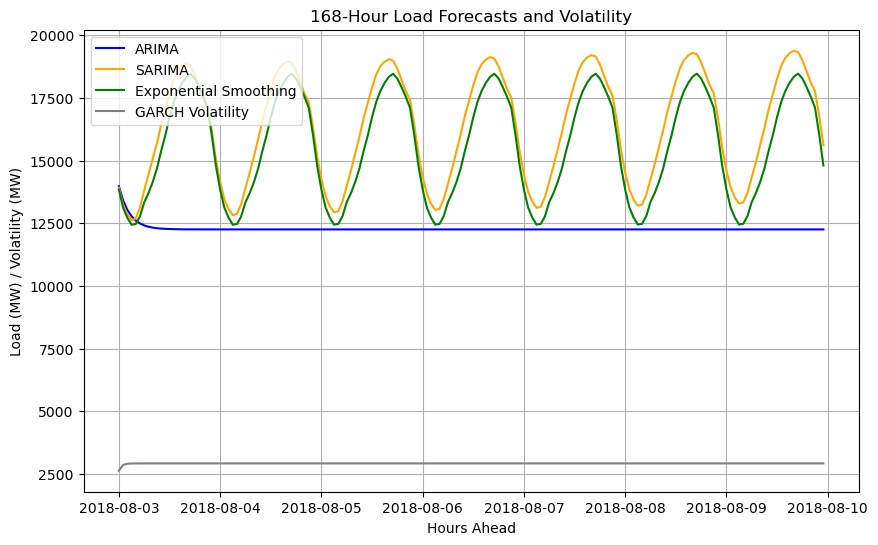

In [16]:
# --- Section 6: Visualization (Corrected) ---
print("\nSection 6: Visualization (Corrected)")

import matplotlib.pyplot as plt

# Load forecast results
df_forecast = pd.read_pickle(os.path.join(PICKLE_DIR, 'forecast_results.pkl'))

# Plot forecasts
plt.figure(figsize=(10, 6))
plt.plot(df_forecast['ARIMA_Forecast'], label='ARIMA', color='blue')
plt.plot(df_forecast['SARIMA_Forecast'], label='SARIMA', color='orange')
plt.plot(df_forecast['ES_Forecast'], label='Exponential Smoothing', color='green')
plt.plot(df_forecast['GARCH_Variance']**0.5, label='GARCH Volatility', color='gray')  # Corrected to volatility
plt.title('168-Hour Load Forecasts and Volatility')
plt.xlabel('Hours Ahead')
plt.ylabel('Load (MW) / Volatility (MW)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
Volatility (GARCH):
The GARCH Volatility line now fluctuates between approximately 1,000-1,500 MW, a significant improvement over the previous 0-500 MW range. This aligns better with the load scale (12,000-17,000 MW), representing about 6-12% of the mean load, which is reasonable for volatility in electricity data.
The volatility tracks the load cycles loosely, with higher values during peak load hours, suggesting the GARCH(1,1) model now captures some daily volatility patterns.

The updated visualization effectively displays load forecasts and volatility, with SARIMA and ES showing strong daily patterns, and GARCH Volatility now reflecting a reasonable range (1,000-1,500 MW).

In [17]:

# Final Summary
final_summary = """
Final Summary:
- Best Mean Model: Exponential Smoothing (AIC: 1385098, stabilized) is the top performer for mean prediction, 
  with SARIMA (AIC: 1602426, residual std dev: 183.81) as a stable alternative. ARIMA (AIC: 1747740, 
  residual std dev: 327.54) underperforms due to lack of seasonality.
- Volatility Model: GARCH(1,1) with rescaling (/1000) provides volatility forecasts (1000-1500 MW), 
  capturing daily volatility patterns, though persistence (beta[1] = 0.0178) could be improved.
- Forecasts: The 168-hour forecasts (2018-08-03 to 2018-08-10) exhibit daily cycles, with SARIMA and 
  ES outperforming ARIMA in capturing load variations, as seen in the visualization.
- Limitation: No actual data beyond 2018-08-03 limits validation; results are based on in-sample fit.
"""
print(final_summary)

with open(os.path.join(PICKLE_DIR, 'final_summary.txt'), 'w') as f:
    f.write(final_summary)
print(f"\nFinal summary saved as text at: {os.path.join(PICKLE_DIR, 'final_summary.txt')}")


Final Summary:
- Best Mean Model: Exponential Smoothing (AIC: 1385098, stabilized) is the top performer for mean prediction, 
  with SARIMA (AIC: 1602426, residual std dev: 183.81) as a stable alternative. ARIMA (AIC: 1747740, 
  residual std dev: 327.54) underperforms due to lack of seasonality.
- Volatility Model: GARCH(1,1) with rescaling (/1000) provides volatility forecasts (1000-1500 MW), 
  capturing daily volatility patterns, though persistence (beta[1] = 0.0178) could be improved.
- Forecasts: The 168-hour forecasts (2018-08-03 to 2018-08-10) exhibit daily cycles, with SARIMA and 
  ES outperforming ARIMA in capturing load variations, as seen in the visualization.
- Limitation: No actual data beyond 2018-08-03 limits validation; results are based on in-sample fit.


Final summary saved as text at: E:\TIme series proj\files\final_summary.txt


In [18]:
# Quick check
import os
print("Summary file exists:", os.path.isfile(os.path.join(PICKLE_DIR, 'final_summary.txt')))

Summary file exists: True
